In [38]:
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [39]:
df=pd.read_csv('salary.csv')
#Data is taken from
#https://www.kaggle.com/datasets/ayessa/salary-prediction-classification?select=salary.csv


The guide I used to conduct my EDA was taken from:
    https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html

# 1. Basic data set exploration

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
df.shape

(32561, 15)

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.1 Data dictionary verification

Need to verify the values of each of the values of the categorical variables with the data dictionary.

age: continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous.  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


In [43]:
for feature in df.select_dtypes(include='object'):
    print((feature), df[feature].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' '

In [44]:
#replacing ? with missing
df.replace(' ?' , 'missing' ,inplace=True)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [45]:
for feature in df.select_dtypes(include='object'):
    print((feature), df[feature].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'missing' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' 'missing'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' 

### 1.2 Check for duplicates

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
df[df.duplicated()]
#but these aren't duplicates, keeping them

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,missing,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


## Distribution

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64


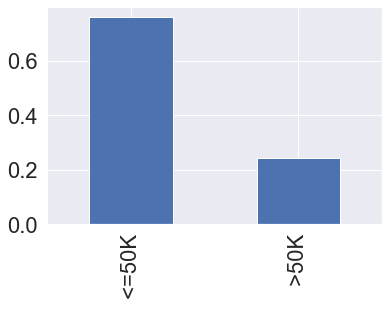

In [48]:
outcome = df["salary"].value_counts(normalize=True)
print(outcome)
outcome.plot(kind='bar')
plt.show()

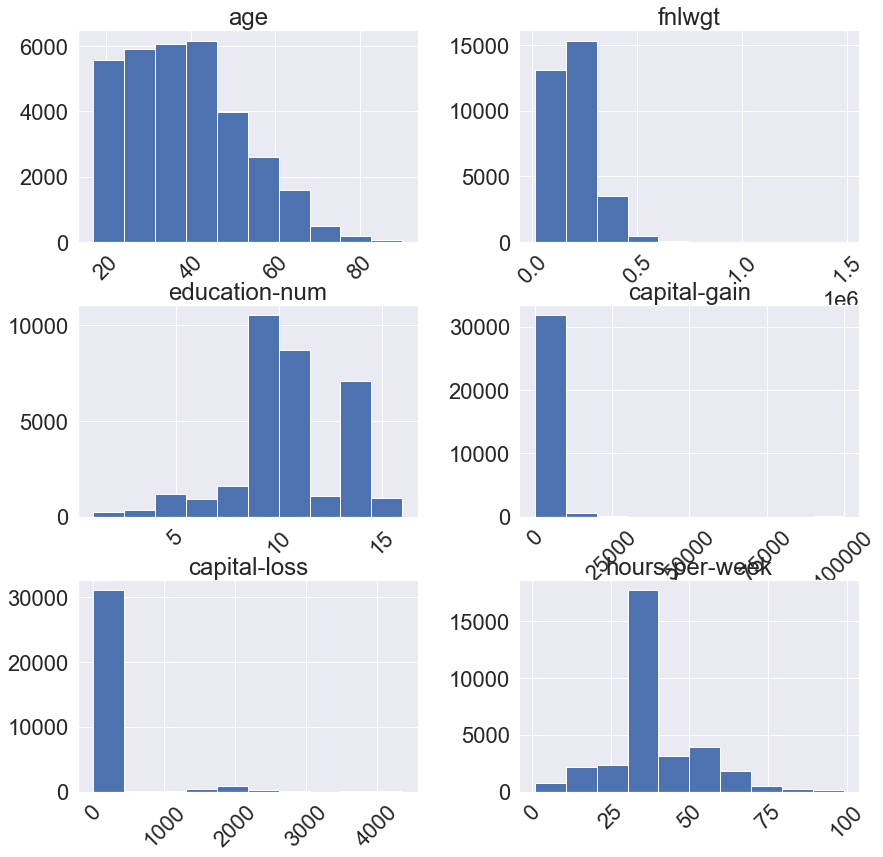

In [49]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

In [50]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [52]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
df.to_pickle("df.pkl")

# 3. Grouping & Segmentation  

### 3.1 Segment the target variable (class) by categorical features

In [54]:
#df = pd.read_pickle("df.pkl")

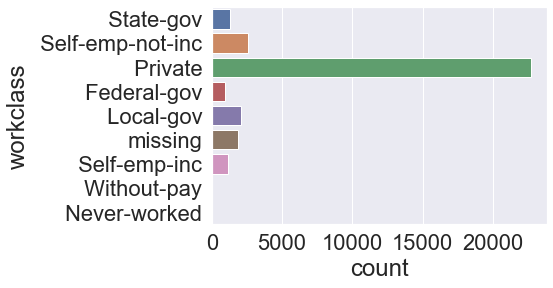

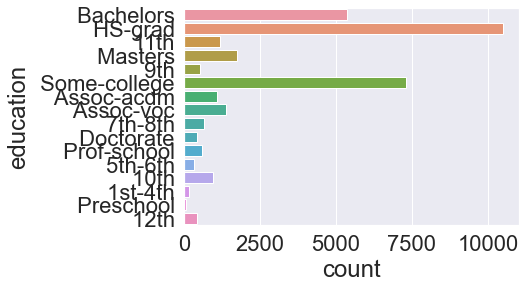

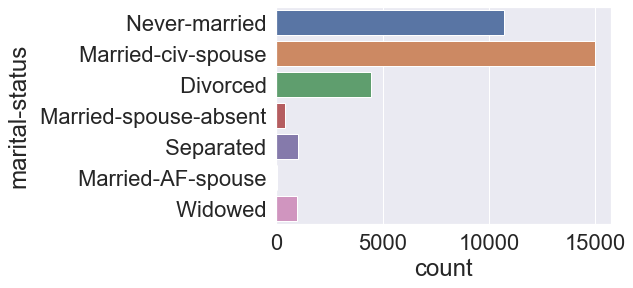

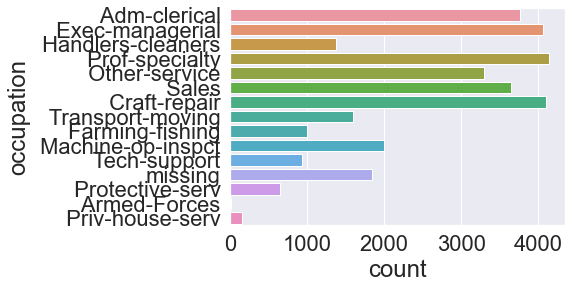

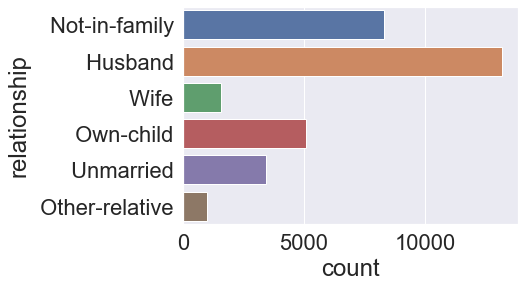

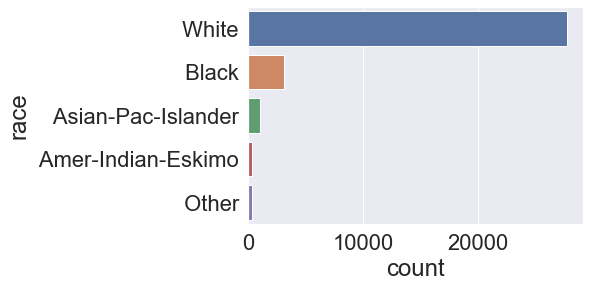

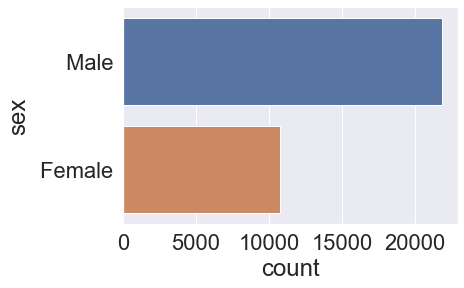

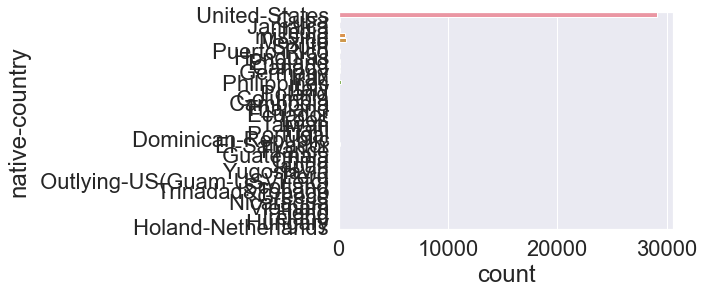

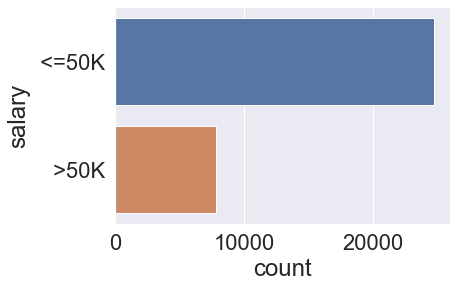

In [55]:
for column in df.select_dtypes(include='object'):
    sns.countplot(y=column, data=df)
    plt.show()
        

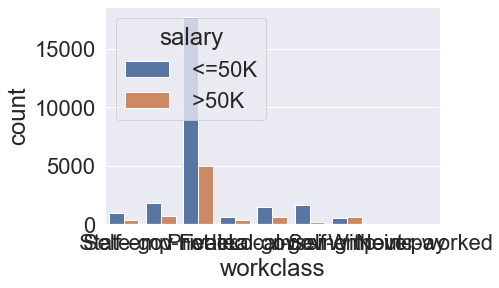

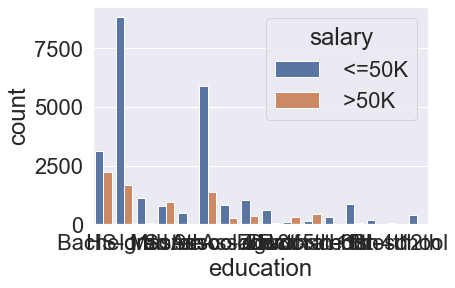

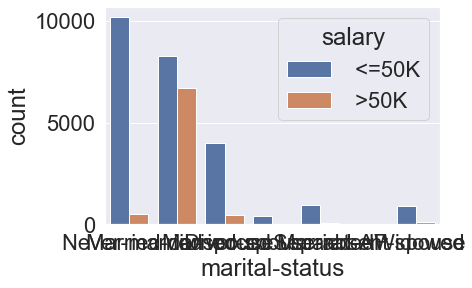

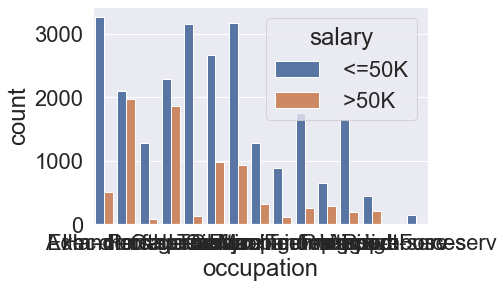

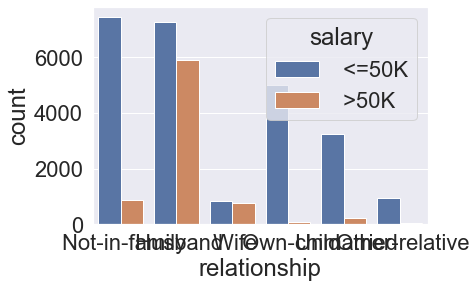

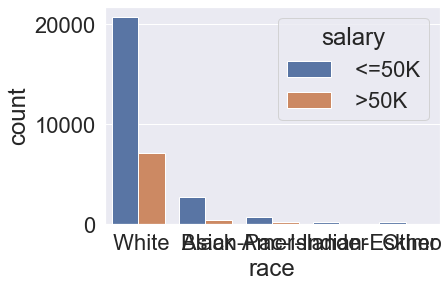

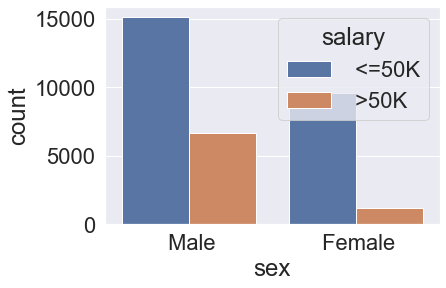

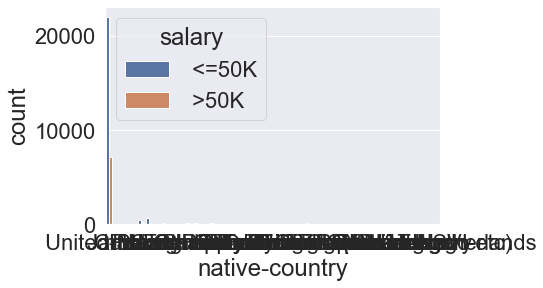

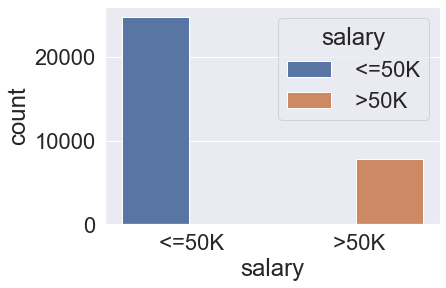

In [56]:
for column in df.select_dtypes(include='object'):
    sns.countplot(x=column, hue="salary", data=df)
    plt.show()

### 3.2 Segment the target variable (class) by numerical features

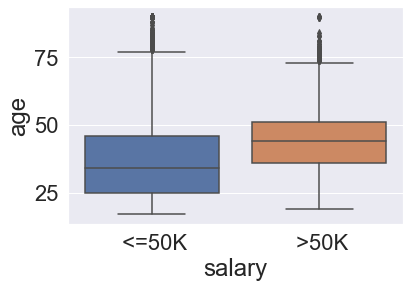

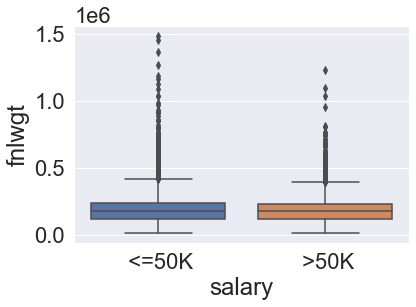

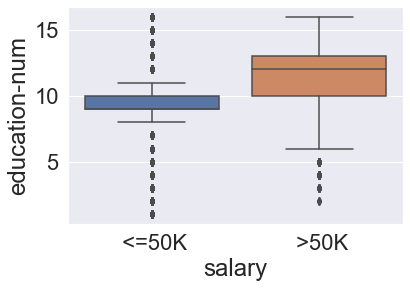

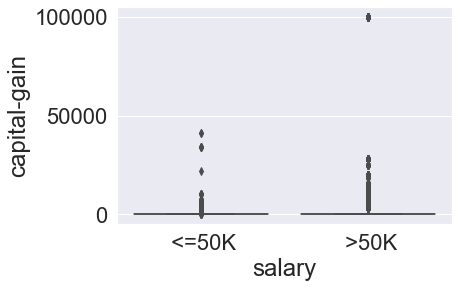

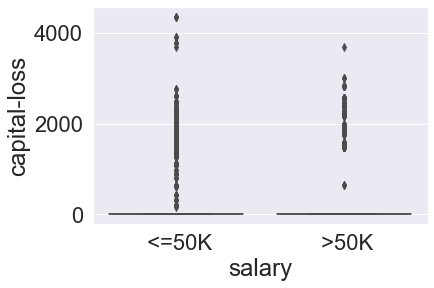

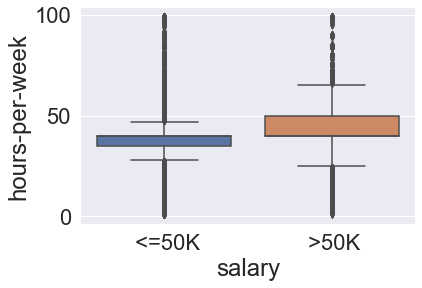

In [57]:
for column in df.select_dtypes(include='int64'):
    sns.boxplot(y=column, x="salary", data=df)
    plt.show()

### 3.3 Group numeric features by each categorical feature.

In [58]:
for column in df.select_dtypes(include='object'):
    display(df.groupby(column).mean())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
workclass,,,,,,
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286
missing,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
marital-status,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,,
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669
Priv-house-serv,41.724832,201107.523490,7.362416,279.852349,21.449664,32.885906


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
native-country,,,,,,
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453
England,41.155556,182375.166667,11.011111,864.722222,82.755556,41.833333


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


### 3.4 Correlations matrix for the different numerical features.

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


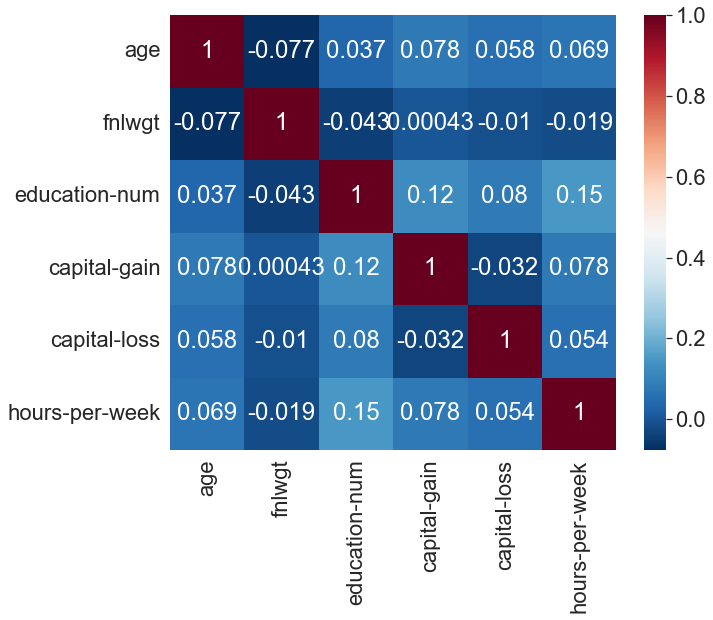

In [59]:
corrs = df.corr()
print(corrs)
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [60]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

### 3.5 Removing out of context values for age x hours per week

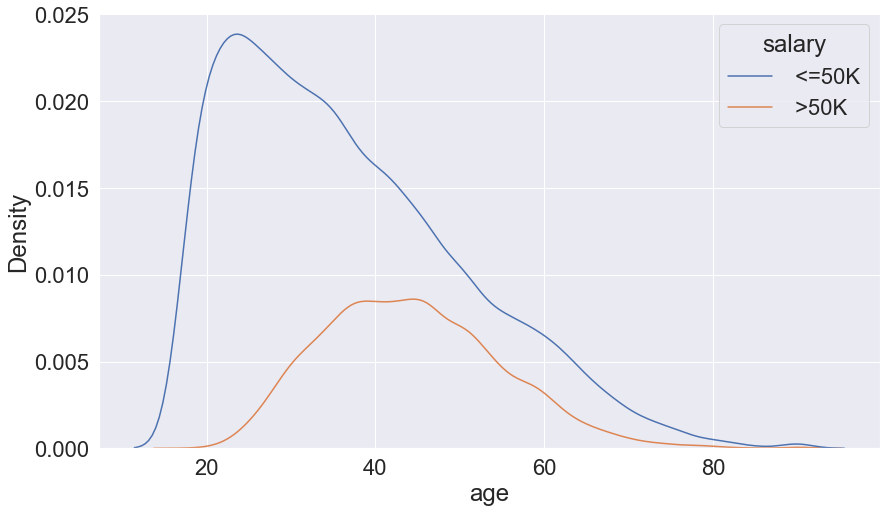

In [61]:
plt.figure(figsize=(14,8))
sns.set(font_scale=2)
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()


In [25]:
df_old = df[(df.age >=80)&(df['hours-per-week'] >=50)]
df_old

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5406,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
6232,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
7481,83,Private,195507,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,missing,<=50K


In [26]:
#gonna drop these cases
df.drop(df.loc[df_old.index].index,axis=0,inplace=True)

In [27]:
#sanity check
df[(df.age >=80)&(df['hours-per-week'] >=50)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


## 4. One hot encoding

Replacing the dependent variables with binary (0s and 1s).

In [28]:
#going to predict the MORE THAN >50K, this will be the MINORITY CLASS, 1, POSITIVE.
#accuracy and F1 score will be our metrics 

#$52,942 was the median household income in USA 1994

#TP = >50k and predicted as such (1) CORRECTLY
#FN = <=50k but predicted as >50k INCORRECT (labeled as 1 but a 0)
#TN = <=50k and predicted as such (0) CORRECT
#FP = >50k but predicted as <=50k INCORRECT (labeled as 0 but a 1)


df = df.replace([" >50K", " <=50K"], [1, 0], regex = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [29]:
for feature in df.select_dtypes(include='object'):
    print((feature), df[feature].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'missing' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' 'missing'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32545 non-null  int64 
 1   workclass       32545 non-null  object
 2   fnlwgt          32545 non-null  int64 
 3   education       32545 non-null  object
 4   education-num   32545 non-null  int64 
 5   marital-status  32545 non-null  object
 6   occupation      32545 non-null  object
 7   relationship    32545 non-null  object
 8   race            32545 non-null  object
 9   sex             32545 non-null  object
 10  capital-gain    32545 non-null  int64 
 11  capital-loss    32545 non-null  int64 
 12  hours-per-week  32545 non-null  int64 
 13  native-country  32545 non-null  object
 14  salary          32545 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [31]:
#going to drop education since education-num is same thing but numeric form
df.drop('education', inplace=True, axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32545 non-null  int64 
 1   workclass       32545 non-null  object
 2   fnlwgt          32545 non-null  int64 
 3   education-num   32545 non-null  int64 
 4   marital-status  32545 non-null  object
 5   occupation      32545 non-null  object
 6   relationship    32545 non-null  object
 7   race            32545 non-null  object
 8   sex             32545 non-null  object
 9   capital-gain    32545 non-null  int64 
 10  capital-loss    32545 non-null  int64 
 11  hours-per-week  32545 non-null  int64 
 12  native-country  32545 non-null  object
 13  salary          32545 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.7+ MB


In [33]:
df.to_pickle("df_cl_nodummies.pkl")

In [34]:
df = pd.get_dummies(df, columns=['workclass', 'marital-status',
                                                    'occupation', 'relationship',
                                                    'race', 'sex',
                                                    'native-country'], drop_first=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32545 non-null  int64
 1   fnlwgt                                      32545 non-null  int64
 2   education-num                               32545 non-null  int64
 3   capital-gain                                32545 non-null  int64
 4   capital-loss                                32545 non-null  int64
 5   hours-per-week                              32545 non-null  int64
 6   salary                                      32545 non-null  int64
 7   workclass_ Local-gov                        32545 non-null  uint8
 8   workclass_ Never-worked                     32545 non-null  uint8
 9   workclass_ Private                          32545 non-null  uint8
 10  workclass_ Self-emp-inc           

In [36]:
df.to_pickle("df_cl_dummies.pkl")